## Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb 
import warnings
warnings.filterwarnings('ignore')

## Read file

In [3]:
data = pd.read_csv('dataset_list.csv',usecols=['Open_Time','Incident_ID'])
data.head()

,Incident_ID,Open_Time
0,IM0000004,05-02-2012 13:32
1,IM0000005,12-03-2012 15:44
2,IM0000006,29-03-2012 12:36
3,IM0000011,17-07-2012 11:49
4,IM0000012,10-08-2012 11:01


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46606 entries, 0 to 46605
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Incident_ID  46606 non-null  object
 1   Open_Time    46606 non-null  object
dtypes: object(2)
memory usage: 728.3+ KB


In [5]:
data.Open_Time.value_counts()

24-03-2014 08:54    7
24-01-2014 09:37    6
21-01-2014 11:49    6
12-11-2013 11:04    6
07-02-2014 10:44    6
                   ..
27-02-2014 03:00    1
27-11-2013 15:12    1
03-02-2014 10:50    1
25-10-2013 12:28    1
17-10-2013 18:23    1
Name: Open_Time, Length: 34636, dtype: int64

In [6]:
data.isnull().sum()

Incident_ID    0
Open_Time      0
dtype: int64

In [7]:
data['No_of_Incidents'] = data.groupby('Open_Time')['Incident_ID'].transform('count')
data.head()

,Incident_ID,Open_Time,No_of_Incidents
0,IM0000004,05-02-2012 13:32,1
1,IM0000005,12-03-2012 15:44,1
2,IM0000006,29-03-2012 12:36,1
3,IM0000011,17-07-2012 11:49,1
4,IM0000012,10-08-2012 11:01,1


## Coverting all the values in proper Datetime format

In [8]:
data['Open_Dates'] = pd.to_datetime(data['Open_Time']).dt.date
data['Open_Time'] = pd.to_datetime(data['Open_Time']).dt.time


data['Open_Dates'] = pd.to_datetime(data['Open_Dates']).dt.date
data['Open_Dates']= pd.to_datetime(data['Open_Dates'], infer_datetime_format=True)
data.head()

,Incident_ID,Open_Time,No_of_Incidents,Open_Dates
0,IM0000004,13:32:00,1,2012-05-02
1,IM0000005,15:44:00,1,2012-12-03
2,IM0000006,12:36:00,1,2012-03-29
3,IM0000011,11:49:00,1,2012-07-17
4,IM0000012,11:01:00,1,2012-10-08


## Value count

In [9]:
data.Open_Dates.value_counts()

2013-11-18    569
2014-01-27    500
2014-01-21    476
2014-03-02    466
2014-02-17    461
             ... 
2012-08-22      1
2013-01-22      1
2013-09-04      1
2012-07-17      1
2012-10-18      1
Name: Open_Dates, Length: 331, dtype: int64

In [10]:
data.No_of_Incidents.value_counts()

1    25192
2    14734
3     5112
4     1228
5      285
6       48
7        7
Name: No_of_Incidents, dtype: int64

In [11]:
data.Incident_ID.value_counts()

IM0039498    1
IM0010339    1
IM0041725    1
IM0017443    1
IM0045213    1
            ..
IM0017913    1
IM0030187    1
IM0010942    1
IM0005738    1
IM0031127    1
Name: Incident_ID, Length: 46606, dtype: int64

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46606 entries, 0 to 46605
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Incident_ID      46606 non-null  object        
 1   Open_Time        46606 non-null  object        
 2   No_of_Incidents  46606 non-null  int64         
 3   Open_Dates       46606 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 1.4+ MB


## Duplicates

In [13]:
data['Incident_ID'].duplicated().sum()

0

In [14]:
data['Open_Dates'].duplicated().sum()

46275

## Drop file

In [15]:
data.drop(['Incident_ID'],axis=1,inplace=True)
data.drop(['Open_Time'],axis=1,inplace=True)
data

,No_of_Incidents,Open_Dates
0,1,2012-05-02
1,1,2012-12-03
2,1,2012-03-29
3,1,2012-07-17
4,1,2012-10-08
...,...,...
46601,1,2014-03-31
46602,1,2014-03-31
46603,1,2014-03-31
46604,1,2014-03-31


## Autocorrelation plot

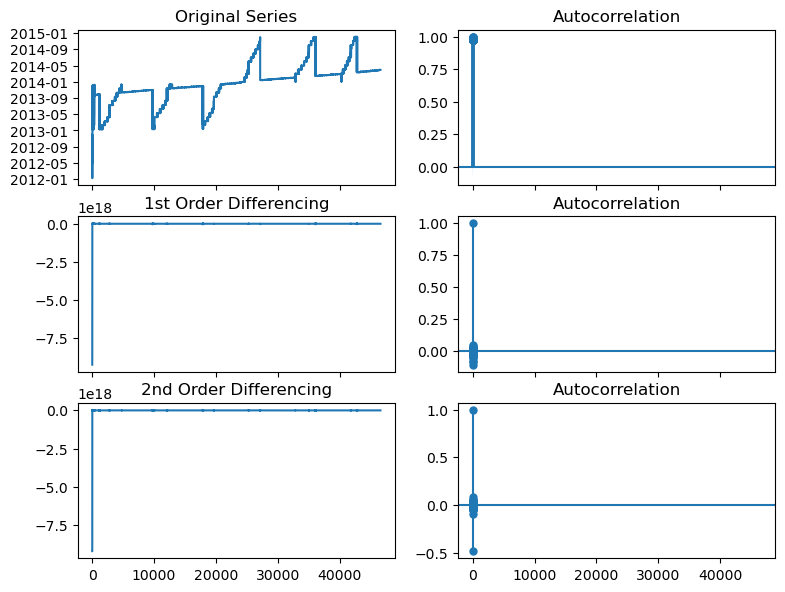

In [16]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':100})

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(data.Open_Dates); axes[0, 0].set_title('Original Series')
plot_acf(data.Open_Dates, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(data.Open_Dates.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(data.Open_Dates.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(data.Open_Dates.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(data.Open_Dates.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

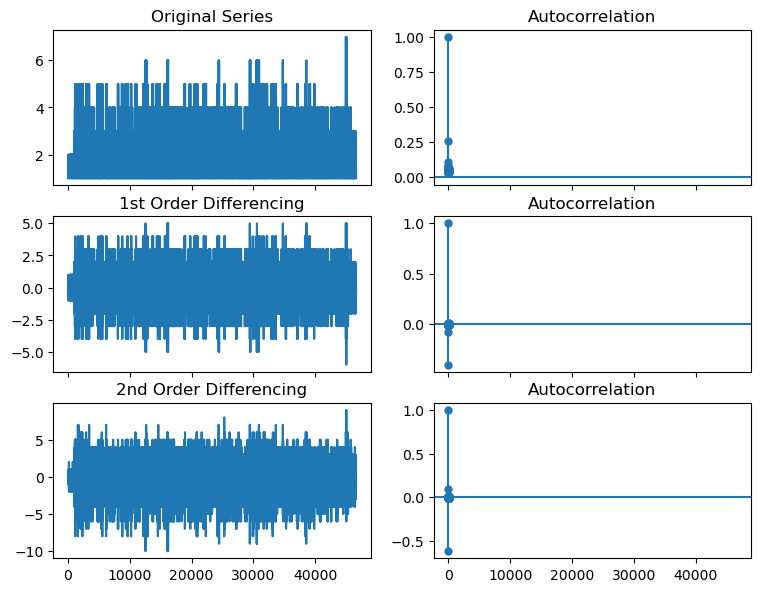

In [17]:
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':100})

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(data.No_of_Incidents); axes[0, 0].set_title('Original Series')
plot_acf(data.No_of_Incidents, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(data.No_of_Incidents.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(data.No_of_Incidents.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(data.No_of_Incidents.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(data.No_of_Incidents.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

## Setting Dates as the Index

In [18]:
data2=data.set_index(['Open_Dates'])
data2

,No_of_Incidents
Open_Dates,
2012-05-02,1
2012-12-03,1
2012-03-29,1
2012-07-17,1
2012-10-08,1
...,...
2014-03-31,1
2014-03-31,1
2014-03-31,1


In [19]:
data3 = data2.groupby('Open_Dates').aggregate(np.sum)
data3

,No_of_Incidents
Open_Dates,
2012-01-10,1
2012-02-10,1
2012-03-09,1
2012-03-29,1
2012-05-02,1
...,...
2014-11-02,639
2014-11-03,534
2014-12-01,1


In [20]:
data3.describe()

,No_of_Incidents
count,331.000000
mean,231.631420
std,299.219029
min,1.000000
25%,2.000000
50%,7.000000
75%,528.500000
max,1167.000000


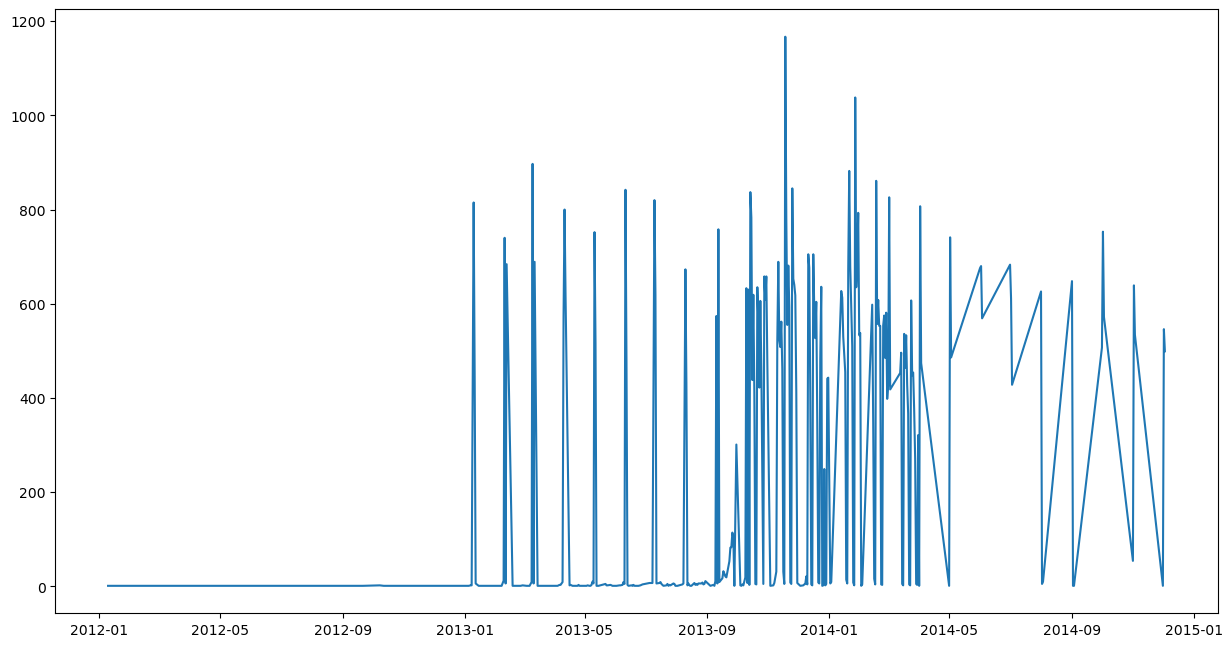

In [21]:
plt.figure(figsize=(15,8))
plt.plot(data3)

## Since not many tickets before jan 2013, we consider only the later values

In [22]:
data3 = data3.loc[data3.index >= ('2012-06-01')]
data3

,No_of_Incidents
Open_Dates,
2012-07-12,1
2012-07-17,1
2012-08-15,1
2012-08-22,1
2012-08-29,1
...,...
2014-11-02,639
2014-11-03,534
2014-12-01,1


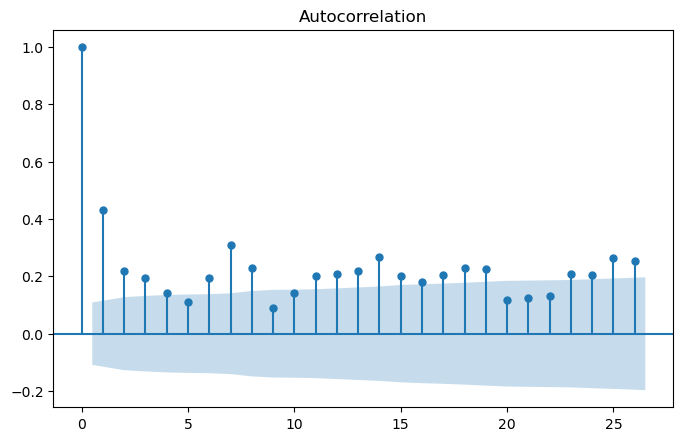

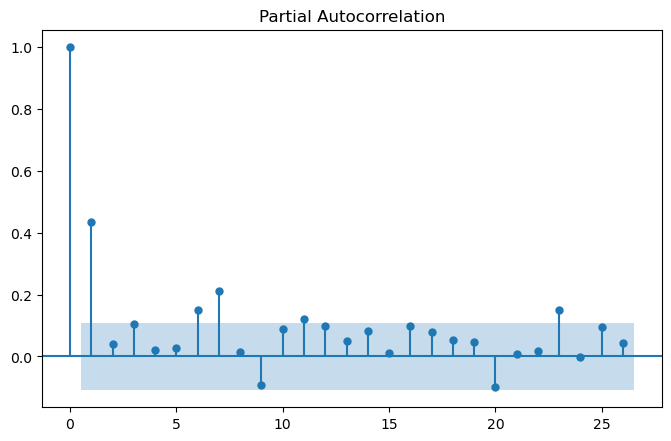

In [23]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plt.rcParams.update({'figure.figsize':(8,5), 'figure.dpi':100})
plot_acf(data3.No_of_Incidents);
plot_pacf(data3.No_of_Incidents);

In [24]:
from statsmodels.tsa.stattools import adfuller

def adfuller_test(data3):
    result=adfuller(data3)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print(" Data has no unit root and is stationary")
    else:
        print(" Data has a unit root, indicating it is non-stationary ")
        
 #If p< 0.05 ; Data is stationary
#if p>0.05; Data is not stationary       

adfuller_test(data3['No_of_Incidents'])

# from plot we can see the series given is stationary

ADF Test Statistic : -2.791938438010878
p-value : 0.05943456382219298
#Lags Used : 11
Number of Observations Used : 313
 Data has a unit root, indicating it is non-stationary 


## Order of the AR term (p)

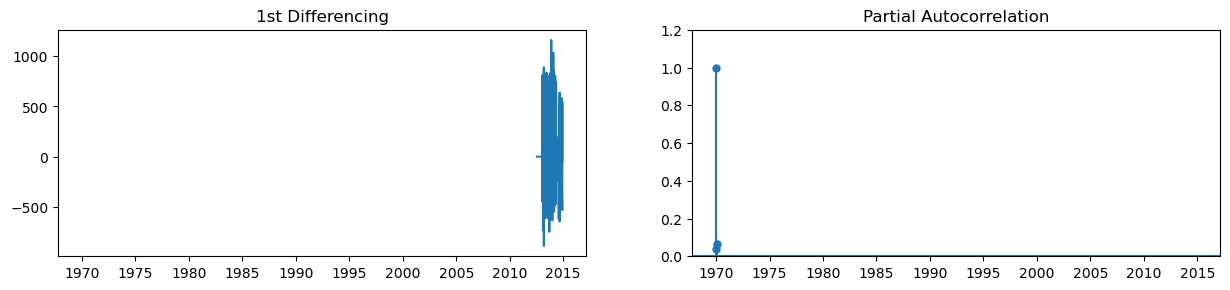

In [25]:
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(15,3), 'figure.dpi':100})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(data3.No_of_Incidents.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_pacf(data3.No_of_Incidents.diff().dropna(), ax=axes[1])

plt.show()

## Order of the MA term (q)

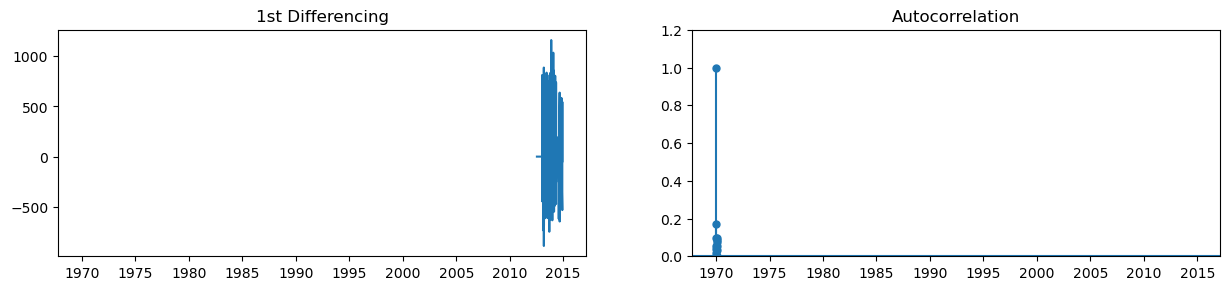

In [26]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.rcParams.update({'figure.figsize':(15,3), 'figure.dpi':100})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(data3.No_of_Incidents.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(data3.No_of_Incidents.diff().dropna(), ax=axes[1])

plt.show()


## Build the ARIMA Model

In [27]:
import warnings
warnings.filterwarnings('ignore')

### 1,1,2 ARIMA Model

In [28]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(data3.No_of_Incidents, order=(1,1,2))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:      D.No_of_Incidents   No. Observations:                  324
Model:                 ARIMA(1, 1, 2)   Log Likelihood               -2261.020
Method:                       css-mle   S.D. of innovations            257.602
Date:                Mon, 14 Feb 2022   AIC                           4532.040
Time:                        20:15:37   BIC                           4550.944
Sample:                             1   HQIC                          4539.586
                                                                              
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       1.3815      0.209      6.609      0.000       0.972       1.791
ar.L1.D.No_of_Incidents     0.1395      0.187      0.745      0.456      -0.227       0.506


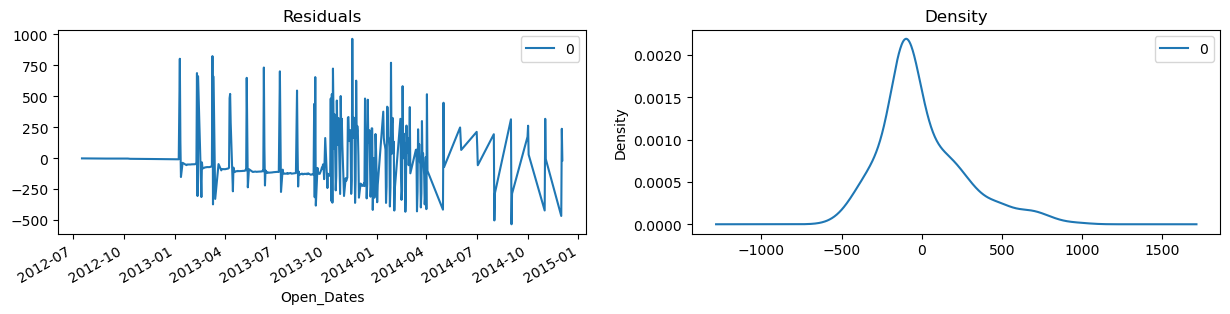

In [29]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

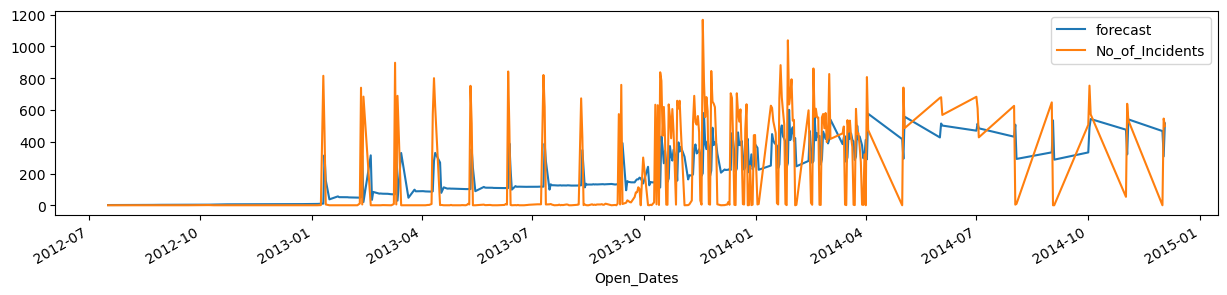

In [30]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.show()

### 1,1,1 ARIMA Model

In [31]:
model0 = ARIMA(data3.No_of_Incidents, order=(1,1,1))
model_fit0 = model.fit(disp=0)
print(model_fit0.summary())

                             ARIMA Model Results                              
Dep. Variable:      D.No_of_Incidents   No. Observations:                  324
Model:                 ARIMA(1, 1, 2)   Log Likelihood               -2261.020
Method:                       css-mle   S.D. of innovations            257.602
Date:                Mon, 14 Feb 2022   AIC                           4532.040
Time:                        20:15:38   BIC                           4550.944
Sample:                             1   HQIC                          4539.586
                                                                              
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       1.3815      0.209      6.609      0.000       0.972       1.791
ar.L1.D.No_of_Incidents     0.1395      0.187      0.745      0.456      -0.227       0.506


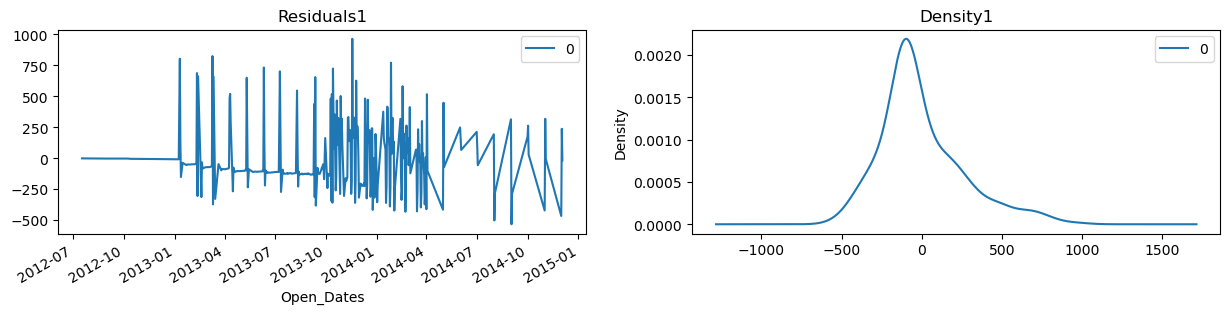

In [32]:
# Plot residual errors
residuals = pd.DataFrame(model_fit0.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals1", ax=ax[0])
residuals.plot(kind='kde', title='Density1', ax=ax[1])
plt.show()

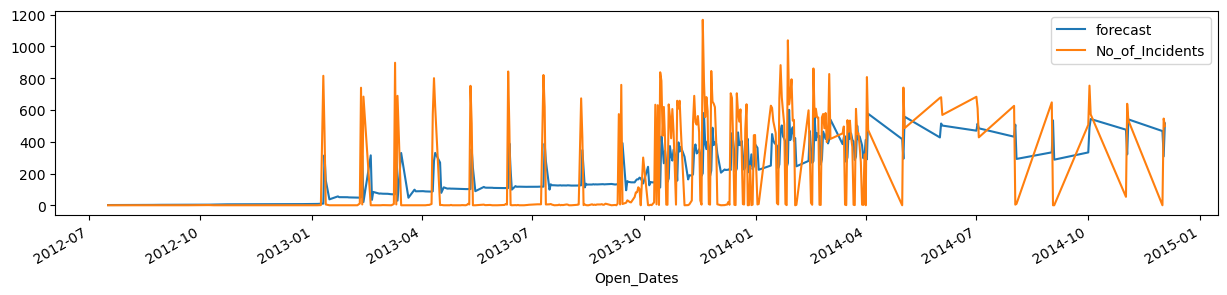

In [33]:
# Actual vs Fitted
model_fit0.plot_predict(dynamic=False)
plt.show()

### Optimal ARIMA model manually using Out-of-Time Cross validation

In [34]:
from statsmodels.tsa.stattools import acf

# Create Training and Test
train = data3.No_of_Incidents[:270]
test = data3.No_of_Incidents[270:]

### Build Model with order (1, 1, 1)

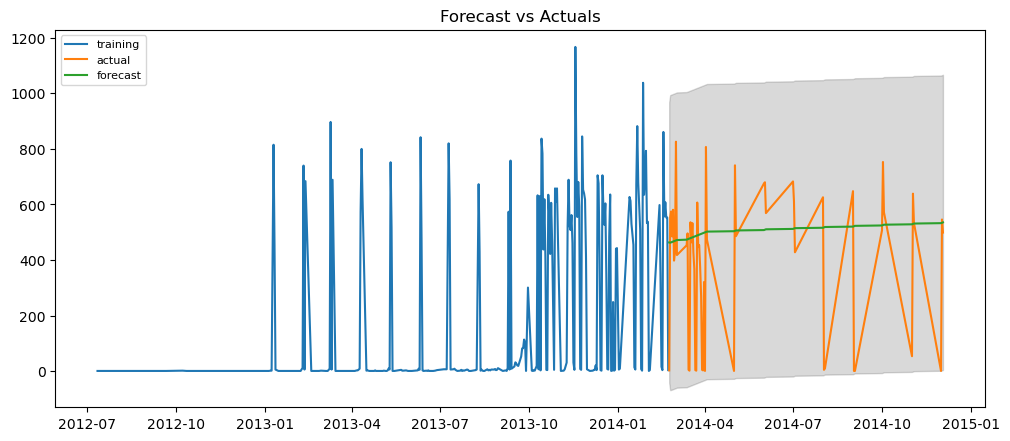

In [36]:
model1 = ARIMA(train, order=(1, 1, 1))  
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(55, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

### Build Model with order (2, 2, 0)

                             ARIMA Model Results                              
Dep. Variable:      D.No_of_Incidents   No. Observations:                  324
Model:                 ARIMA(1, 1, 2)   Log Likelihood               -2261.020
Method:                       css-mle   S.D. of innovations            257.602
Date:                Mon, 14 Feb 2022   AIC                           4532.040
Time:                        20:16:20   BIC                           4550.944
Sample:                             1   HQIC                          4539.586
                                                                              
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       1.3815      0.209      6.609      0.000       0.972       1.791
ar.L1.D.No_of_Incidents     0.1395      0.187      0.745      0.456      -0.227       0.506


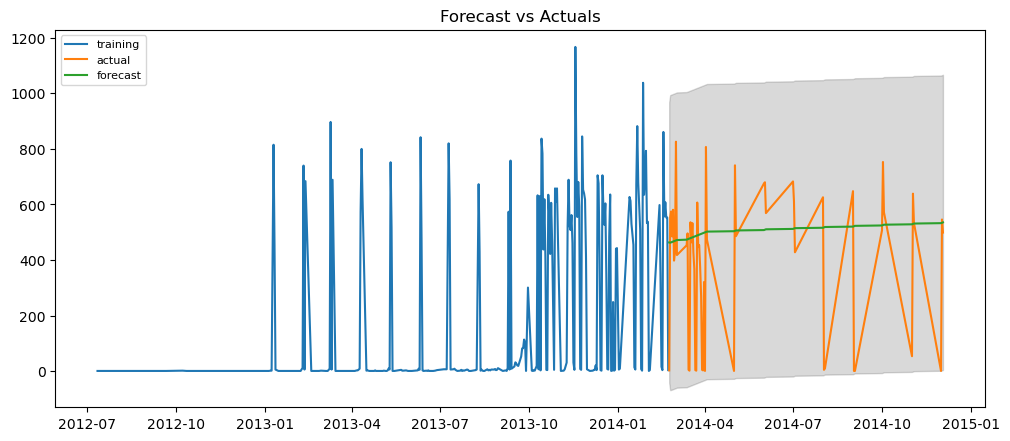

In [37]:
model2 = ARIMA(train, order=(2, 2, 0))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

# Forecast
fc, se, conf = fitted.forecast(55, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

## Accuracy metrics

In [38]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})

forecast_accuracy(fc, test.values)

{'mape': 70.12881012003973,
 'me': 105.68317076037228,
 'mae': 206.76360195579687,
 'mpe': 69.9788161745733,
 'rmse': 281.1256845088861,
 'acf1': 0.10492033932940152,
 'corr': 0.00968679061316754,
 'minmax': 0.3871555874899747}

## Auto Arima Forecast

In [39]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm


model3 = pm.auto_arima(data3.No_of_Incidents, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model3.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=4571.231, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=4788.006, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=4612.541, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=4673.943, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=4548.758, Time=0.24 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=4605.419, Time=0.05 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=4549.121, Time=0.32 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=4549.118, Time=0.39 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=4547.174, Time=0.22 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=4649.397, Time=0.08 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=4549.119, Time=0.31 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=4631.379, Time=0.08 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=4551.115, Time=0.37 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=4550.343, Time=0.37 sec

Best model:  ARIMA(1,0,2)(0,0,0)

## Residual plots of ARIMA model

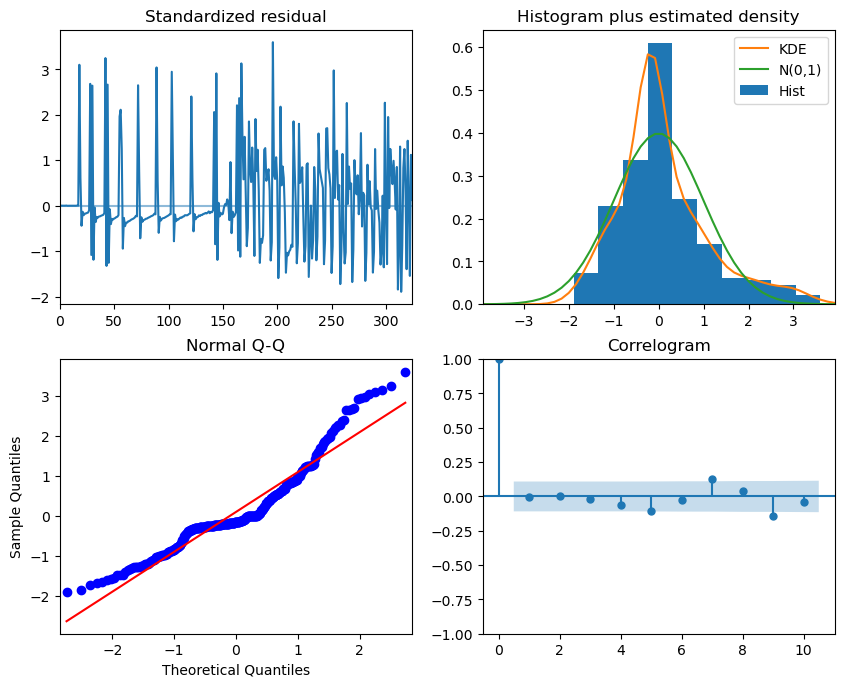

In [40]:
model3.plot_diagnostics(figsize=(10,8))
plt.show()

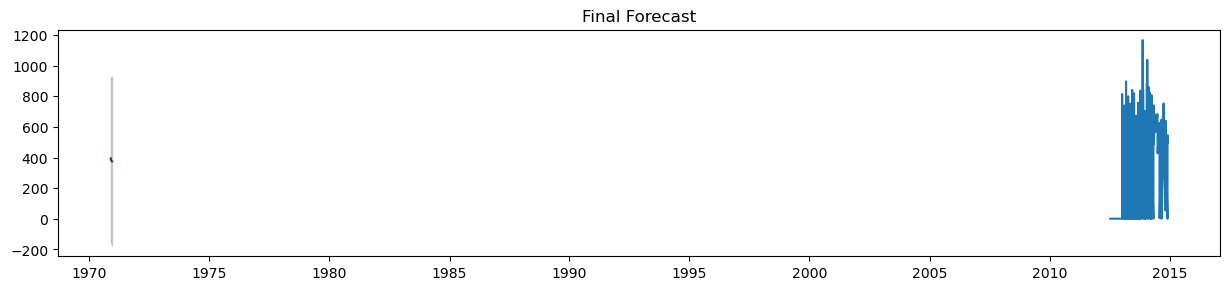

In [41]:
# Forecast
n_periods = 20
fc, confint = model3.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(data3.No_of_Incidents), len(data3.No_of_Incidents)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(data3.No_of_Incidents)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Final Forecast")
plt.show()